# Data Analysis for Assignment 2: Antara Ballal 

Database: KADOC database covering the years 1975 to 1980

Original file used: check.xlsx

Updated file name after latitude and longitude addition: updated_check.xlsx

# 1. Basic Data Description

These are the functions used to do some basic data analysis on the database, using file check_updated.xlxs. The process of creating this file is mentioned below. 

### 1.1 Current Publication Frequency

This code analysed the 'Current Publication Frequency' column, and visualized the distribution of the rates of frequencies. 

In [71]:
import pandas as pd
from tabulate import tabulate

file_path = '/Users/antara/Desktop/updated_check.xlsx'

df = pd.read_excel(file_path)

frequency_counts = df['Current Publication Frequency'].value_counts().reset_index()
frequency_counts.columns = ['Publication Frequency', 'Count']

print(tabulate(frequency_counts, headers='keys', tablefmt='pretty'))


+----+-------------------------------------------------------------------+-------+
|    |                       Publication Frequency                       | Count |
+----+-------------------------------------------------------------------+-------+
| 0  |                             Quarterly                             |  288  |
| 1  |                              Unknown                              |  208  |
| 2  |                              Monthly                              |  133  |
| 3  |                             Bimonthly                             |  109  |
| 4  |                               Other                               |  23   |
| 5  |                             Irregular                             |  22   |
| 6  |                        Three Times A Year                         |  16   |
| 7  |                            Semiannual                             |  16   |
| 8  |                              Weekly                               |  12   |
| 9 

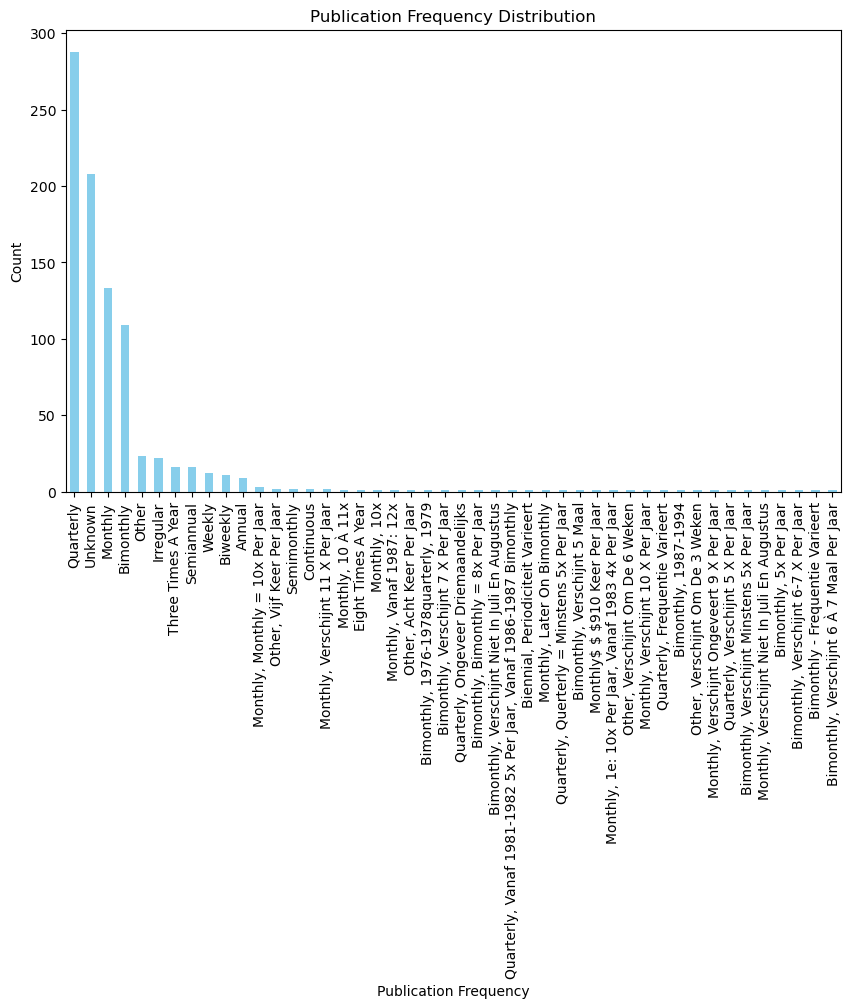

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(file)

fc = df['Current Publication Frequency'].value_counts()

plt.figure(figsize=(10, 6))
fc.plot(kind='bar', color='skyblue')
plt.title('Publication Frequency Distribution')
plt.xlabel('Publication Frequency')
plt.ylabel('Count')
plt.show()


### 1.2 Exploration of Genre/Form

This code explored the 'Genre/Form' column, and visualized the distribution of the rates of frequencies. 

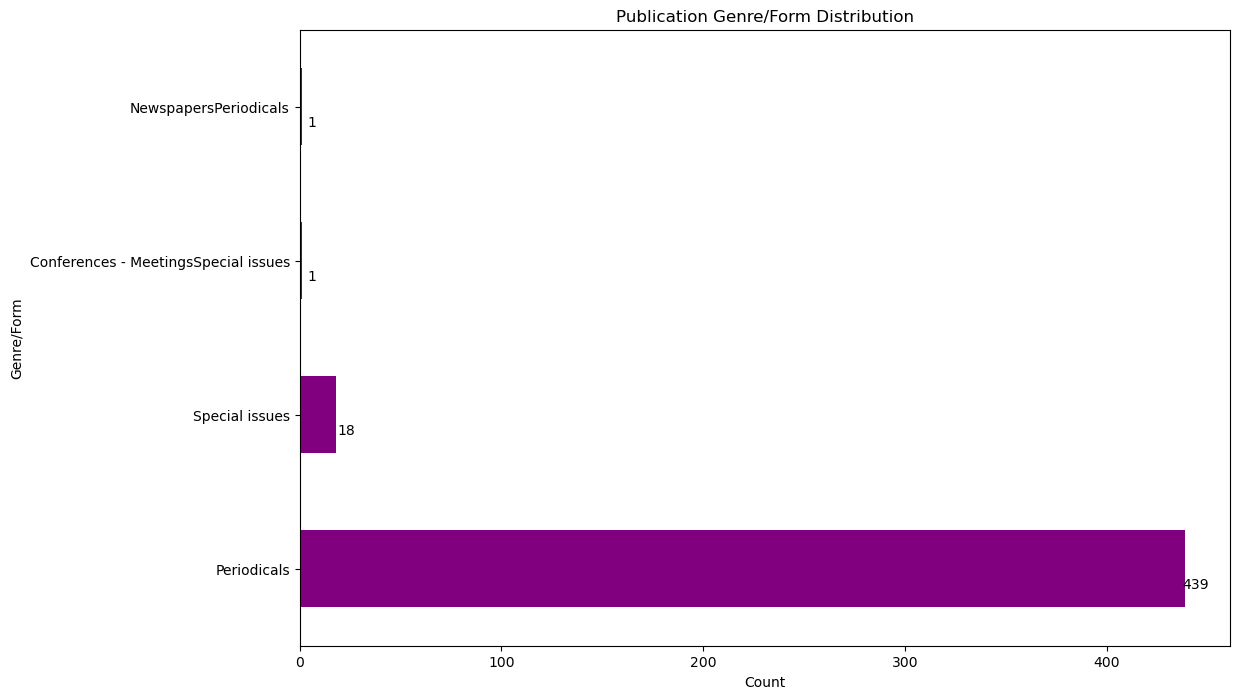

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(file)

gc = df['Genre/Form'].value_counts()

plt.figure(figsize=(12, 8))
bars = gc.plot(kind='barh', color='purple')

for bar, count in zip(bars.patches, gc):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2 - 0.1, f'{count}', ha='center', va='center')

plt.title('Publication Genre/Form Distribution')
plt.xlabel('Count')
plt.ylabel('Genre/Form')
plt.show()



# 2. Exploration of timeline of publication 


### 2.1 Start date analysis


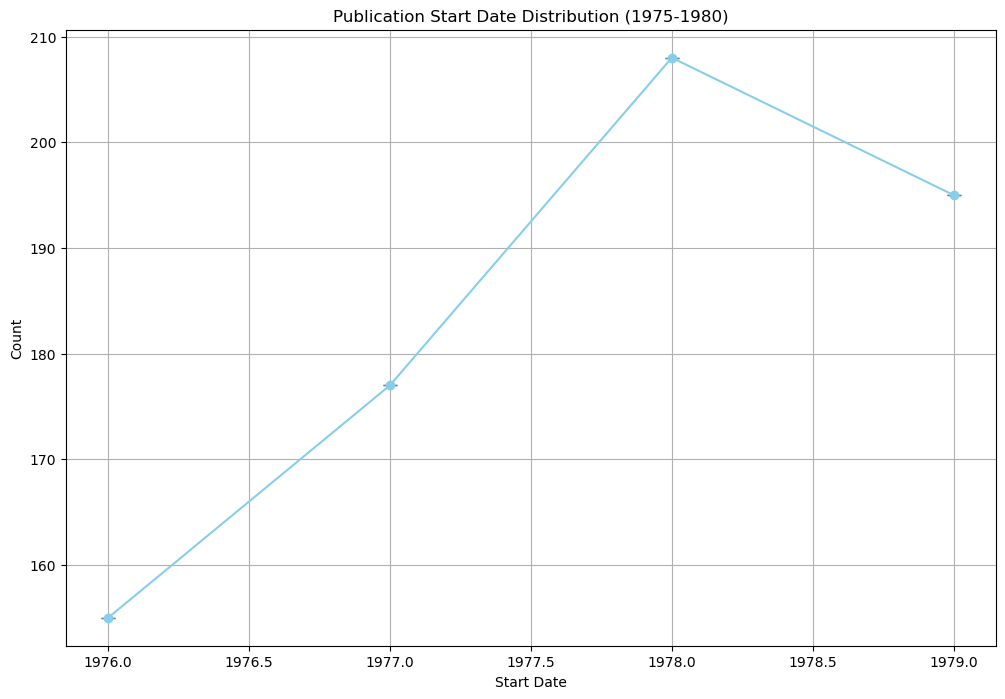

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/antara/Desktop/updated_check.xlsx'

df = pd.read_excel(file_path)

df['Start Date'] = pd.to_numeric(df['Start Date'], errors='coerce')

filtered_df = df[(df['Start Date'] >= 1975) & (df['Start Date'] <= 1981)]

grouped_data = filtered_df.groupby('Start Date')['Start Date'].agg(['count', 'std']).reset_index()

plt.figure(figsize=(12, 8))
plt.errorbar(grouped_data['Start Date'], grouped_data['count'], yerr=grouped_data['std'], marker='o', linestyle='-', color='skyblue', ecolor='gray', capsize=5)
plt.title('Publication Start Date Distribution (1975-1980)')
plt.xlabel('Start Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### 2.2 Length of time publications run for 

In [72]:
import pandas as pd

df = pd.read_excel(file_path)

df = df.dropna(subset=['Start Date', 'End Date'])

df['Start Date'] = pd.to_numeric(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_numeric(df['End Date'], errors='coerce')

df['publication duration'] = df['End Date'] - df['Start Date']

average_duration = df['publication duration'].mean()

print(f'The average number of years a publication runs for is: {average_duration:.2f} years')


The average number of years a publication runs for is: 14.64 years


# 3. Exploration of location of publication

###  3.1 Publication Location Distribution 


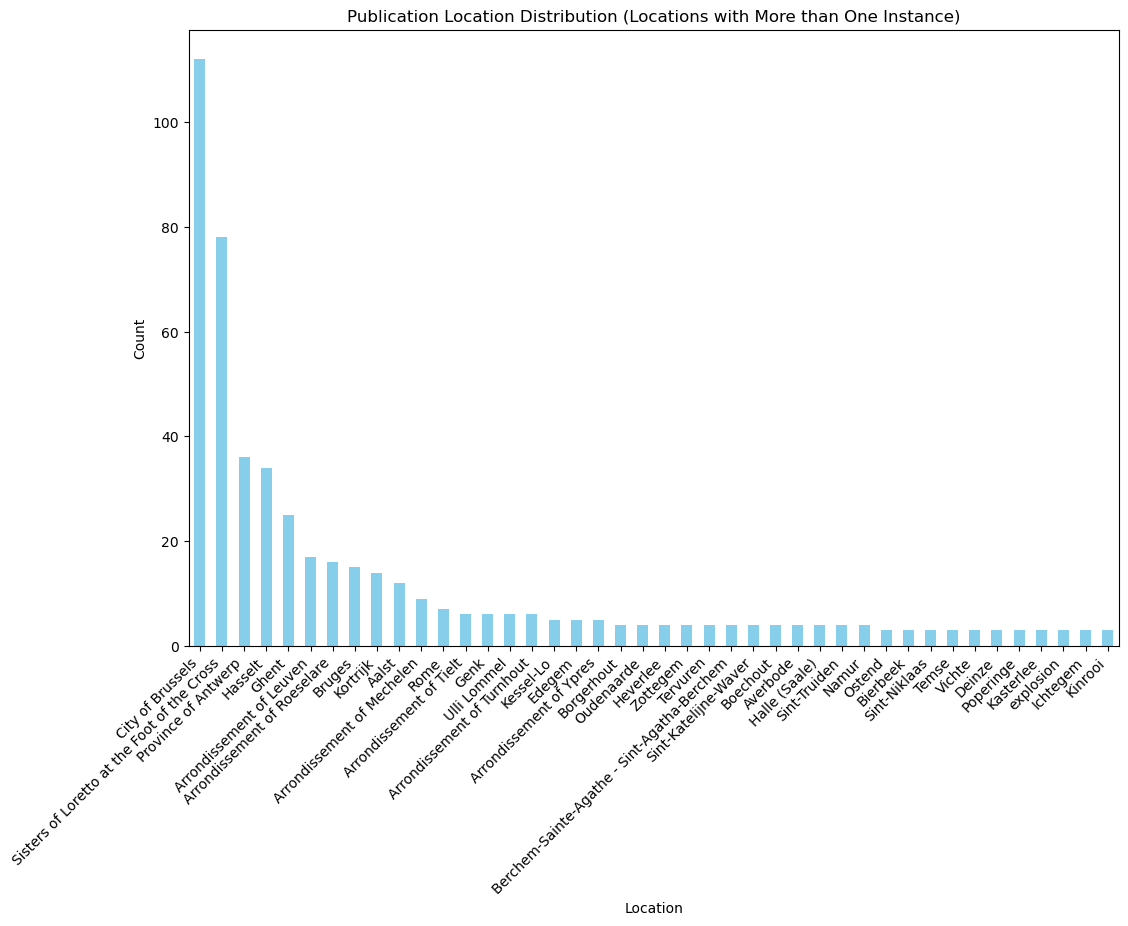

Publication Location Distribution (All Locations):
City of Brussels                                  112
Sisters of Loretto at the Foot of the Cross       78 
Province of Antwerp                               36 
Hasselt                                           34 
Ghent                                             25 
Arrondissement of Leuven                          17 
Arrondissement of Roeselare                       16 
Bruges                                            15 
Kortrijk                                          14 
Aalst                                             12 
Arrondissement of Mechelen                        9  
Rome                                              7  
Arrondissement of Tielt                           6  
Genk                                              6  
Ulli Lommel                                       6  
Arrondissement of Turnhout                        6  
Kessel-Lo                                         5  
Edegem                         

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(file_path)

location_counts = df['$a - Place of publication, distribution'].value_counts()

filtered_locations = location_counts[location_counts > 2]

plt.figure(figsize=(12, 8))
filtered_locations.plot(kind='bar', color='skyblue')
plt.title('Publication Location Distribution (Locations with More than One Instance)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Publication Location Distribution (All Locations):")
print(location_counts)


### 3.2 Creating a map of publication

The following steps are to create an HTML file that contains an interactive map of every publication location and info such as title of publication, date of publication. Two of the three steps needed for this map are done using python. 

**Step 1**: using OpenStreetMap's Nominatim API to update the file check.xlsx, create a new file updated_check.xlsx such that the two new columns for longitude and latitude are added to the file, and these values are filled based on the location mentioned in the column '$a - Place of publication, distribution'.  

In [4]:
!pip install pandas geopy
import osa
import pandas as pd
from geopy.geocoders import Nominatim

excel_file = '/Users/antara/Desktop/check.xlsx'

user_agent = 'location_hunt'

data = pd.read_excel(excel_file)

geolocator = Nominatim(user_agent=user_agent)

def get_lat_lon(place):
    location = geolocator.geocode(place)
    return (location.latitude, location.longitude) if location else (None, None)

data['Latitude'], data['Longitude'] = zip(*data['$a - Place of publication, distribution'].apply(get_lat_lon))

output_directory = '/Users/antara/Desktop/'  
output_file = os.path.join(output_directory, 'updated_' + os.path.basename(excel_file))

os.makedirs(output_directory, exist_ok=True)

data.to_excel(output_file, index=False)

print(f"Geocoding completed. Updated data saved to {output_file}")


/Users/antara/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Geocoding completed. Updated data saved to /Users/antara/Desktop/updated_check.xlsx


**Step 2**: using the Python library Folium, data from the Latitude and Longitude columns of the file check.xlsx is added to create an interactive map containing pins for each publication, which displays the title of publication, year of publication, and location when clicked. This is saved as map_with_markers_and_info.html

In [9]:
!pip install folium
import folium

mean_lat = data['Latitude'].mean()
mean_lon = data['Longitude'].mean()

my_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=2)

for index, row in data.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        popup_text = f"Title: {row['Title Information']}<br>Year: {row['$c - Date of publication, distribution']}<br>Place: {row['$a - Place of publication, distribution']}"
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_text).add_to(my_map)

my_map.save("map_with_markers_and_info.html")



**Step 3**: The created HTML file was made into a link using GitHub Pages. 